In [21]:
import pandas as pd

'''
Info: https://hastie.su.domains/ElemStatLearn/

A retrospective sample of males in a heart-disease high-risk region
of the Western Cape, South Africa. There are roughly two controls per
case of CHD. Many of the CHD positive men have undergone blood
pressure reduction treatment and other programs to reduce their risk
factors after their CHD event. In some cases the measurements were
made after these treatments. These data are taken from a larger
dataset, described in  Rousseauw et al, 1983, South African Medical
Journal.

sbp		systolic blood pressure
tobacco		cumulative tobacco (kg)
ldl		low densiity lipoprotein cholesterol
adiposity
famhist		family history of heart disease (Present, Absent)
typea		type-A behavior
obesity
alcohol		current alcohol consumption
age		age at onset
chd		response, coronary heart disease
'''

url = "https://hastie.su.domains/ElemStatLearn/datasets/SAheart.data"

# Load the SAheart dataset
df = pd.read_csv(url, index_col='row.names')

df.famhist = pd.Categorical(df.famhist).codes

In [22]:
df

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
row.names,,,,,,,,,,
1,160,12.00,5.73,23.11,1,49,25.30,97.20,52,1
2,144,0.01,4.41,28.61,0,55,28.87,2.06,63,1
3,118,0.08,3.48,32.28,1,52,29.14,3.81,46,0
4,170,7.50,6.41,38.03,1,51,31.99,24.26,58,1
5,134,13.60,3.50,27.78,1,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...
459,214,0.40,5.98,31.72,0,64,28.45,0.00,58,0
460,182,4.20,4.41,32.10,0,52,28.61,18.72,52,1
461,108,3.00,1.59,15.23,0,40,20.09,26.64,55,0


In [23]:
attributeNames = df.columns.tolist()
attributeNames

['sbp',
 'tobacco',
 'ldl',
 'adiposity',
 'famhist',
 'typea',
 'obesity',
 'alcohol',
 'age',
 'chd']

In [24]:
X = df.to_numpy()

# Compute values of N, M and C.
M = len(attributeNames)

M

10

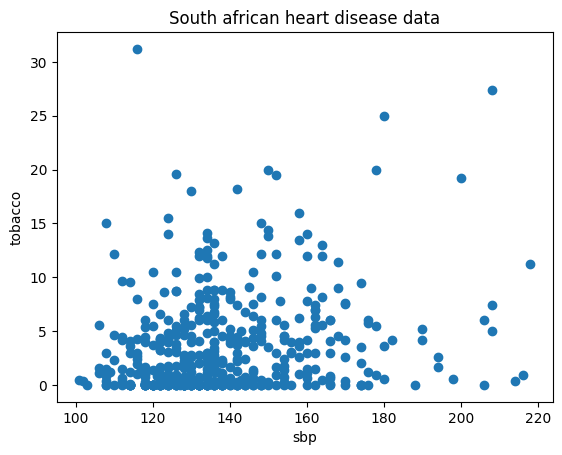

Ran Exercise 3.1.2


In [25]:
# exercise 3.1.2
# (requires data structures from ex. 3.1.1)
# Imports the numpy and xlrd package, then runs the ex3_1_1 code
import matplotlib.pyplot as plt

# Data attributes to be plotted
i = 0
j = 1

##
# Make a simple plot of the i'th attribute against the j'th attribute
plt.plot(X[:, i], X[:, j], "o")

##
# Make another more fancy plot that includes legend, class labels,
# attribute names, and a title.

plt.title("South african heart disease data")


plt.xlabel(attributeNames[i])
plt.ylabel(attributeNames[j])

# Output result to screen
plt.show()
print("Ran Exercise 3.1.2")

In [26]:
X

array([[1.600e+02, 1.200e+01, 5.730e+00, ..., 9.720e+01, 5.200e+01,
        1.000e+00],
       [1.440e+02, 1.000e-02, 4.410e+00, ..., 2.060e+00, 6.300e+01,
        1.000e+00],
       [1.180e+02, 8.000e-02, 3.480e+00, ..., 3.810e+00, 4.600e+01,
        0.000e+00],
       ...,
       [1.080e+02, 3.000e+00, 1.590e+00, ..., 2.664e+01, 5.500e+01,
        0.000e+00],
       [1.180e+02, 5.400e+00, 1.161e+01, ..., 2.397e+01, 4.000e+01,
        0.000e+00],
       [1.320e+02, 0.000e+00, 4.820e+00, ..., 0.000e+00, 4.600e+01,
        1.000e+00]], shape=(462, 10))

In [30]:
import numpy as np

N = len(X)


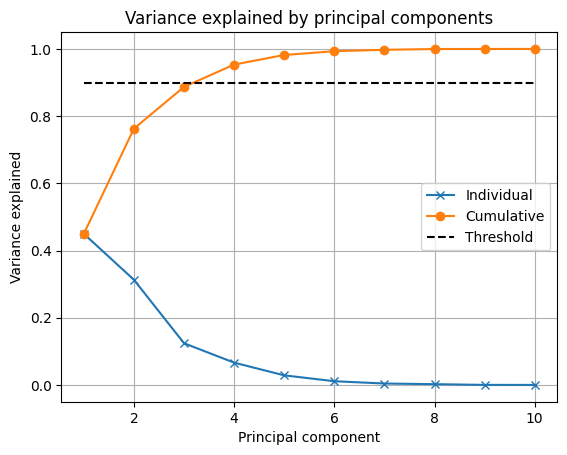

Ran Exercise 3.1.3


In [29]:
# exercise 3.1.3
# (requires data structures from ex. 3.1.1)
import matplotlib.pyplot as plt
from scipy.linalg import svd
import numpy as np

# Subtract mean value from data
# Note: Here we use Y to in teh book we often use X with a hat-symbol on top.
Y = X - np.ones((N, 1))* X.mean(axis=0)

# PCA by computing SVD of Y
# Note: Here we call the Sigma matrix in the SVD S for notational convinience
U, S, Vh = svd(Y, full_matrices=False)

# scipy.linalg.svd returns "Vh", which is the Hermitian (transpose)
# of the vector V. So, for us to obtain the correct V, we transpose:
V = Vh.T

# Compute variance explained by principal components
# Note: This is an important equation, see Eq. 3.18 on page 40 in the book.
rho = (S * S) / (S * S).sum()

threshold = 0.9

# Plot variance explained
plt.figure()
plt.plot(range(1, len(rho) + 1), rho, "x-")
plt.plot(range(1, len(rho) + 1), np.cumsum(rho), "o-")
plt.plot([1, len(rho)], [threshold, threshold], "k--")
plt.title("Variance explained by principal components")
plt.xlabel("Principal component")
plt.ylabel("Variance explained")
plt.legend(["Individual", "Cumulative", "Threshold"])
plt.grid()
plt.show()

print("Ran Exercise 3.1.3")


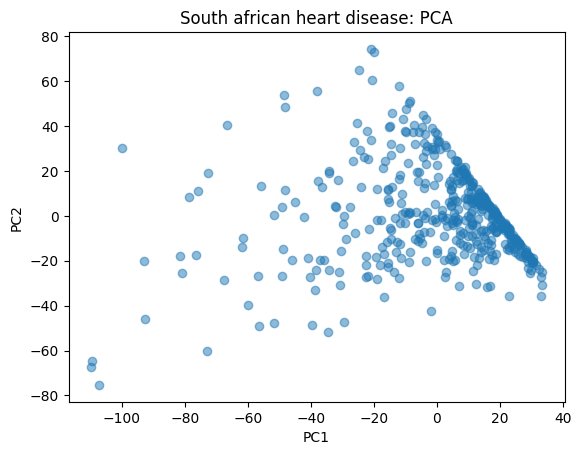

Ran Exercise 3.1.4


In [33]:
import matplotlib.pyplot as plt
from scipy.linalg import svd

# Subtract mean value from data
Y = X - np.ones((N, 1)) * X.mean(0)

# PCA by computing SVD of Y
U, S, Vh = svd(Y, full_matrices=False)
# scipy.linalg.svd returns "Vh", which is the Hermitian (transpose)
# of the vector V. So, for us to obtain the correct V, we transpose:
V = Vh.T

# Project the centered data onto principal component space
# Note: Make absolutely sure you understand what the @ symbol
# does by inspecing the numpy documentation!
Z = Y @ V

# Indices of the principal components to be plotted
i = 0
j = 1

# Plot PCA of the data
f = plt.figure()
plt.title("South african heart disease: PCA")
# Z = array(Z)

plt.plot(Z[:, i], Z[:, j], "o", alpha=0.5)
plt.xlabel("PC{0}".format(i + 1))
plt.ylabel("PC{0}".format(j + 1))

# Output result to screen
plt.show()

print("Ran Exercise 3.1.4")


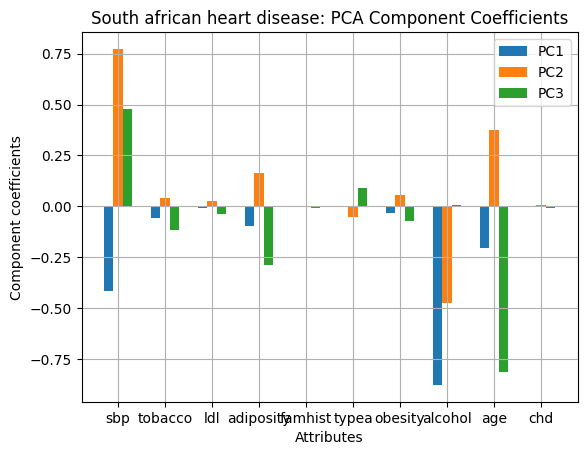

PC2:
[ 0.77379462  0.04182661  0.02445071  0.16375101  0.00218682 -0.05487528
  0.05554107 -0.47597615  0.37336429  0.00501267]


NameError: name 'y' is not defined

In [34]:

import matplotlib.pyplot as plt
from scipy.linalg import svd

Y = X - np.ones((N, 1)) * X.mean(0)
U, S, Vh = svd(Y, full_matrices=False)
V = Vh.T
N, M = X.shape

# We saw in 2.1.3 that the first 3 components explaiend more than 90
# percent of the variance. Let's look at their coefficients:
pcs = [0, 1, 2]
legendStrs = ["PC" + str(e + 1) for e in pcs]
bw = 0.2
r = np.arange(1, M + 1)

for i in pcs:
    plt.bar(r + i * bw, V[:, i], width=bw)

plt.xticks(r + bw, attributeNames)
plt.xlabel("Attributes")
plt.ylabel("Component coefficients")
plt.legend(legendStrs)
plt.grid()
plt.title("South african heart disease: PCA Component Coefficients")
plt.show()

# Inspecting the plot, we see that the 2nd principal component has large
# (in magnitude) coefficients for attributes A, E and H. We can confirm
# this by looking at it's numerical values directly, too:
print("PC2:")
print(V[:, 1].T)

# How does this translate to the actual data and its projections?
# Looking at the data for water:

# Projection of water class onto the 2nd principal component.
all_water_data = Y[y == 4, :]

print("First water observation")
print(all_water_data[0, :])

# Based on the coefficients and the attribute values for the observation
# displayed, would you expect the projection onto PC2 to be positive or
# negative - why? Consider *both* the magnitude and sign of *both* the
# coefficient and the attribute!

# You can determine the projection by (remove comments):
# print("...and its projection onto PC2")
# print(all_water_data[0, :] @ V[:, 1])


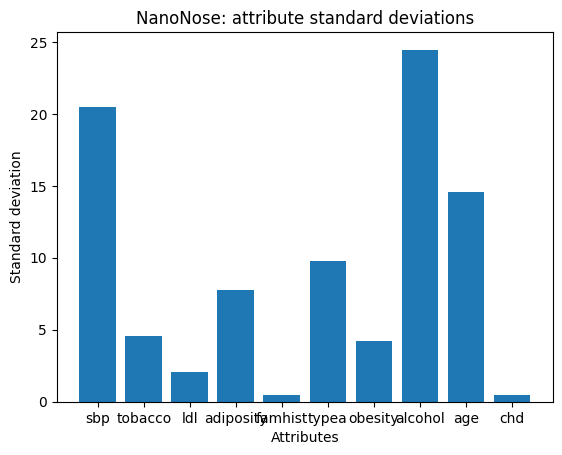

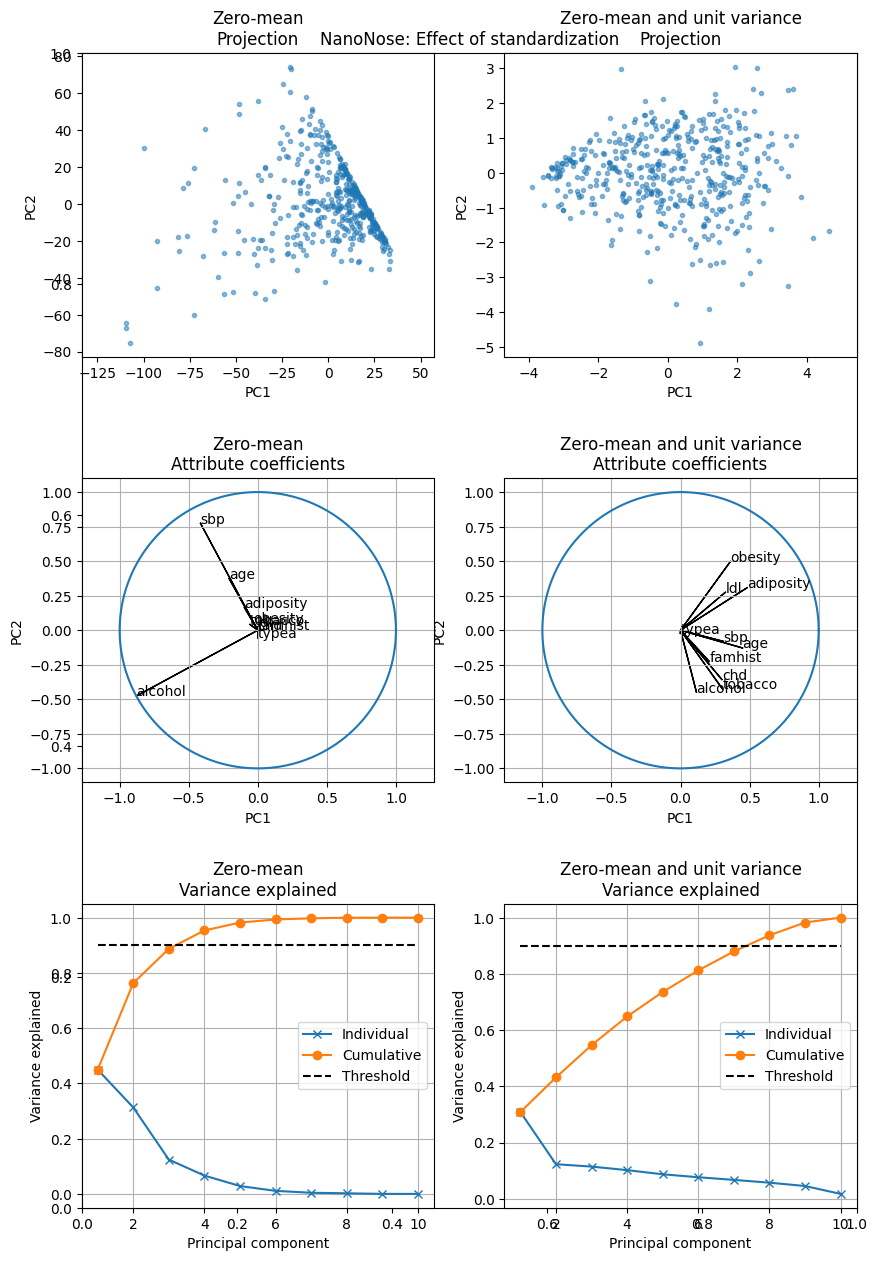

In [36]:
## exercise 3.1.6
import matplotlib.pyplot as plt
from scipy.linalg import svd

r = np.arange(1, X.shape[1] + 1)
plt.bar(r, np.std(X, 0))
plt.xticks(r, attributeNames)
plt.ylabel("Standard deviation")
plt.xlabel("Attributes")
plt.title("NanoNose: attribute standard deviations")

## Investigate how standardization affects PCA

# Try this *later*, and explain the effect
# X_s = X.copy() # Make a to be "scaled" version of X
# X_s[:, 2] = 100*X_s[:, 2] # Scale/multiply attribute C with a factor 100
# Use X_s instead of X to in the script below to see the difference.
# Does it affect the two columns in the plot equally?


# Subtract the mean from the data
Y1 = X - np.ones((N, 1)) * X.mean(0)

# Subtract the mean from the data and divide by the attribute standard
# deviation to obtain a standardized dataset:
Y2 = X - np.ones((N, 1)) * X.mean(0)
Y2 = Y2 * (1 / np.std(Y2, 0))
# Here were utilizing the broadcasting of a row vector to fit the dimensions
# of Y2

# Store the two in a cell, so we can just loop over them:
Ys = [Y1, Y2]
titles = ["Zero-mean", "Zero-mean and unit variance"]
threshold = 0.9
# Choose two PCs to plot (the projection)
i = 0
j = 1

# Make the plot
plt.figure(figsize=(10, 15))
plt.subplots_adjust(hspace=0.4)
plt.title("NanoNose: Effect of standardization")
nrows = 3
ncols = 2
for k in range(2):
    # Obtain the PCA solution by calculate the SVD of either Y1 or Y2
    U, S, Vh = svd(Ys[k], full_matrices=False)
    V = Vh.T  # For the direction of V to fit the convention in the course we transpose
    # For visualization purposes, we flip the directionality of the
    # principal directions such that the directions match for Y1 and Y2.
    if k == 1:
        V = -V
        U = -U

    # Compute variance explained
    rho = (S * S) / (S * S).sum()

    # Compute the projection onto the principal components
    Z = U * S

    # Plot projection
    plt.subplot(nrows, ncols, 1 + k)

    plt.plot(Z[:, i], Z[:, j], ".", alpha=0.5)
    plt.xlabel("PC" + str(i + 1))
    plt.ylabel("PC" + str(j + 1))
    plt.title(titles[k] + "\n" + "Projection")

    plt.axis("equal")

    # Plot attribute coefficients in principal component space
    plt.subplot(nrows, ncols, 3 + k)
    for att in range(V.shape[1]):
        plt.arrow(0, 0, V[att, i], V[att, j])
        plt.text(V[att, i], V[att, j], attributeNames[att])
    plt.xlim([-1, 1])
    plt.ylim([-1, 1])
    plt.xlabel("PC" + str(i + 1))
    plt.ylabel("PC" + str(j + 1))
    plt.grid()
    # Add a unit circle
    plt.plot(
        np.cos(np.arange(0, 2 * np.pi, 0.01)), np.sin(np.arange(0, 2 * np.pi, 0.01))
    )
    plt.title(titles[k] + "\n" + "Attribute coefficients")
    plt.axis("equal")

    # Plot cumulative variance explained
    plt.subplot(nrows, ncols, 5 + k)
    plt.plot(range(1, len(rho) + 1), rho, "x-")
    plt.plot(range(1, len(rho) + 1), np.cumsum(rho), "o-")
    plt.plot([1, len(rho)], [threshold, threshold], "k--")
    plt.title("Variance explained by principal components")
    plt.xlabel("Principal component")
    plt.ylabel("Variance explained")
    plt.legend(["Individual", "Cumulative", "Threshold"])
    plt.grid()
    plt.title(titles[k] + "\n" + "Variance explained")

plt.show()
